In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/tabinda/Yolov8_attention")

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 102.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.8/530.8 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-many

In [6]:
import os

In [7]:
!ls

 best.pt	 LICENSE	    ultralytics
 dataset	 README.md	   'yolov8_1+attention (1).ipynb'
 GRAZPEDWRI-DX	 requirements.txt   yolov8_1+attention_finetune.ipynb
 img		 split.py
 imgaug.py	 start_train.py


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/78.2 GB disk)


In [ ]:
!ls

bus.jpg  data.yaml	   runs		yolov8_1+attention.ipynb  yolov8n.pt
dataset  requirements.txt  ultralytics	yolov8.ipynb


In [10]:
yaml_content = f'''
train: "/content/drive/MyDrive/tabinda/Yolov8_attention/dataset"
val: "/content/drive/MyDrive/tabinda/Yolov8_attention/dataset"

nc: 13  # number of classes
names: ['Barrier','Dead_Vegetation','Dead_woody_substance','Ditches_or_holes','Fencing', 'Fruit_basket', 'Grass', 'Live_vegetation',
'Person', 'stones_&_debris', 'Support_poles', 'Tree_branch', 'Tree_trunk']
'''

file_path = 'data.yaml'
with open(file_path, 'w') as f:
    f.write(yaml_content)

print(f"Content written to {file_path}")


Content written to data.yaml


In [11]:
# !python start_train.py --model ./ultralytics/cfg/models/v8/yolov8m.yaml --data_dir ./GRAZPEDWRI-DX/data/meta.yaml

In [12]:
from ultralytics import YOLO

def main():
    model_path = '/content/drive/MyDrive/tabinda/Yolov8_attention/best.pt'
    data_dir = 'data.yaml'

    model = YOLO(model_path)

    # Setting training parameters, including the number of epochs
    training_params = {
        'data': data_dir,
        'epochs': 30  # specify the number of epochs here
    }

    model.train(**training_params)

if __name__ == '__main__':
    main()


New https://pypi.org/project/ultralytics/8.2.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/tabinda/Yolov8_attention/best.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=F


0: 480x640 5 Dead_Vegetations, 2 Dead_woody_substances, 2 Ditches_or_holess, 1 Grass, 13.7ms
Speed: 1.2ms preprocess, 13.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


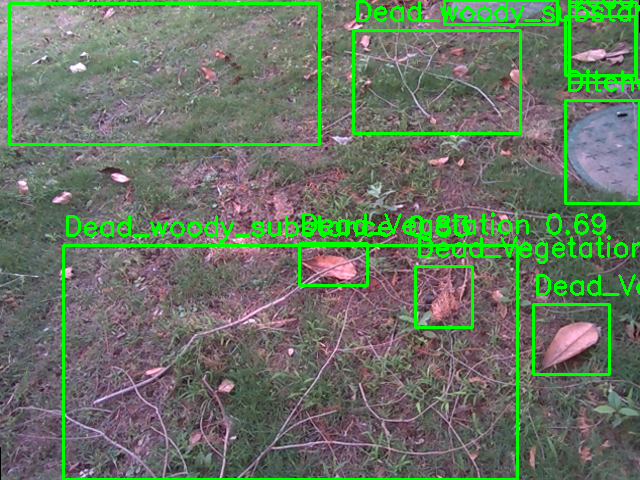

Speed: 1.177072525024414ms preprocess, 13.657569885253906ms inference, 2.1131038665771484ms postprocess per image at shape (480, 640)


In [17]:
import cv2
from ultralytics import YOLO
import torch
from google.colab.patches import cv2_imshow

# Load a model
model = YOLO("/content/drive/MyDrive/tabinda/Yolov8_attention/runs/detect/train/weights/best.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(["/content/drive/MyDrive/tabinda/Yolov8_attention/dataset/images/Dead vegetation_original_bag_data_Color_1717463322012.42700195312500.png_6679a182-c254-490c-803b-884f1b0e332d.png"])  # return a list of Results objects

# Process results list
for result in results:
    img = cv2.imread(result.path)  # Load the original image

    # Draw the bounding boxes on the image
    if result.boxes is not None:
        for box in result.boxes:
            # Extract the coordinates
            x1, y1, x2, y2 = box.xyxy[0].int().tolist()
            label = result.names[box.cls[0].item()]
            confidence = box.conf[0].item()

            # Draw the bounding box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save the result
    result_filename = "/content/drive/MyDrive/tabinda/Yolov8_attention/result.jpg"
    cv2.imwrite(result_filename, img)

    # Display the result using OpenCV
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(f"Speed: {results[0].speed['preprocess']}ms preprocess, {results[0].speed['inference']}ms inference, {results[0].speed['postprocess']}ms postprocess per image at shape {results[0].orig_shape}")


In [ ]:

# def main():
#     model_path = '/content/drive/MyDrive/Yolov8_attention/ultralytics/cfg/models/v8/yolov8_GAM.yaml'
#     data_dir = 'data.yaml'
#     num_epochs = 50  # specify the number of epochs here

#     model = YOLO(model_path)
#     model.train(data=data_dir)

# if __name__ == '__main__':
#     main()


In [ ]:
# !ls

In [ ]:
# !yolo task=detect mode=train model=yolov8s.pt imgsz=640 data=data.yaml epochs=2 batch=1 name=yolov8n_custom

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/Yolov8_attention/runs/detect/train/weights/best.pt" conf=0.25 source='/content/drive/MyDrive/Yolov8_attention/test' save=True

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

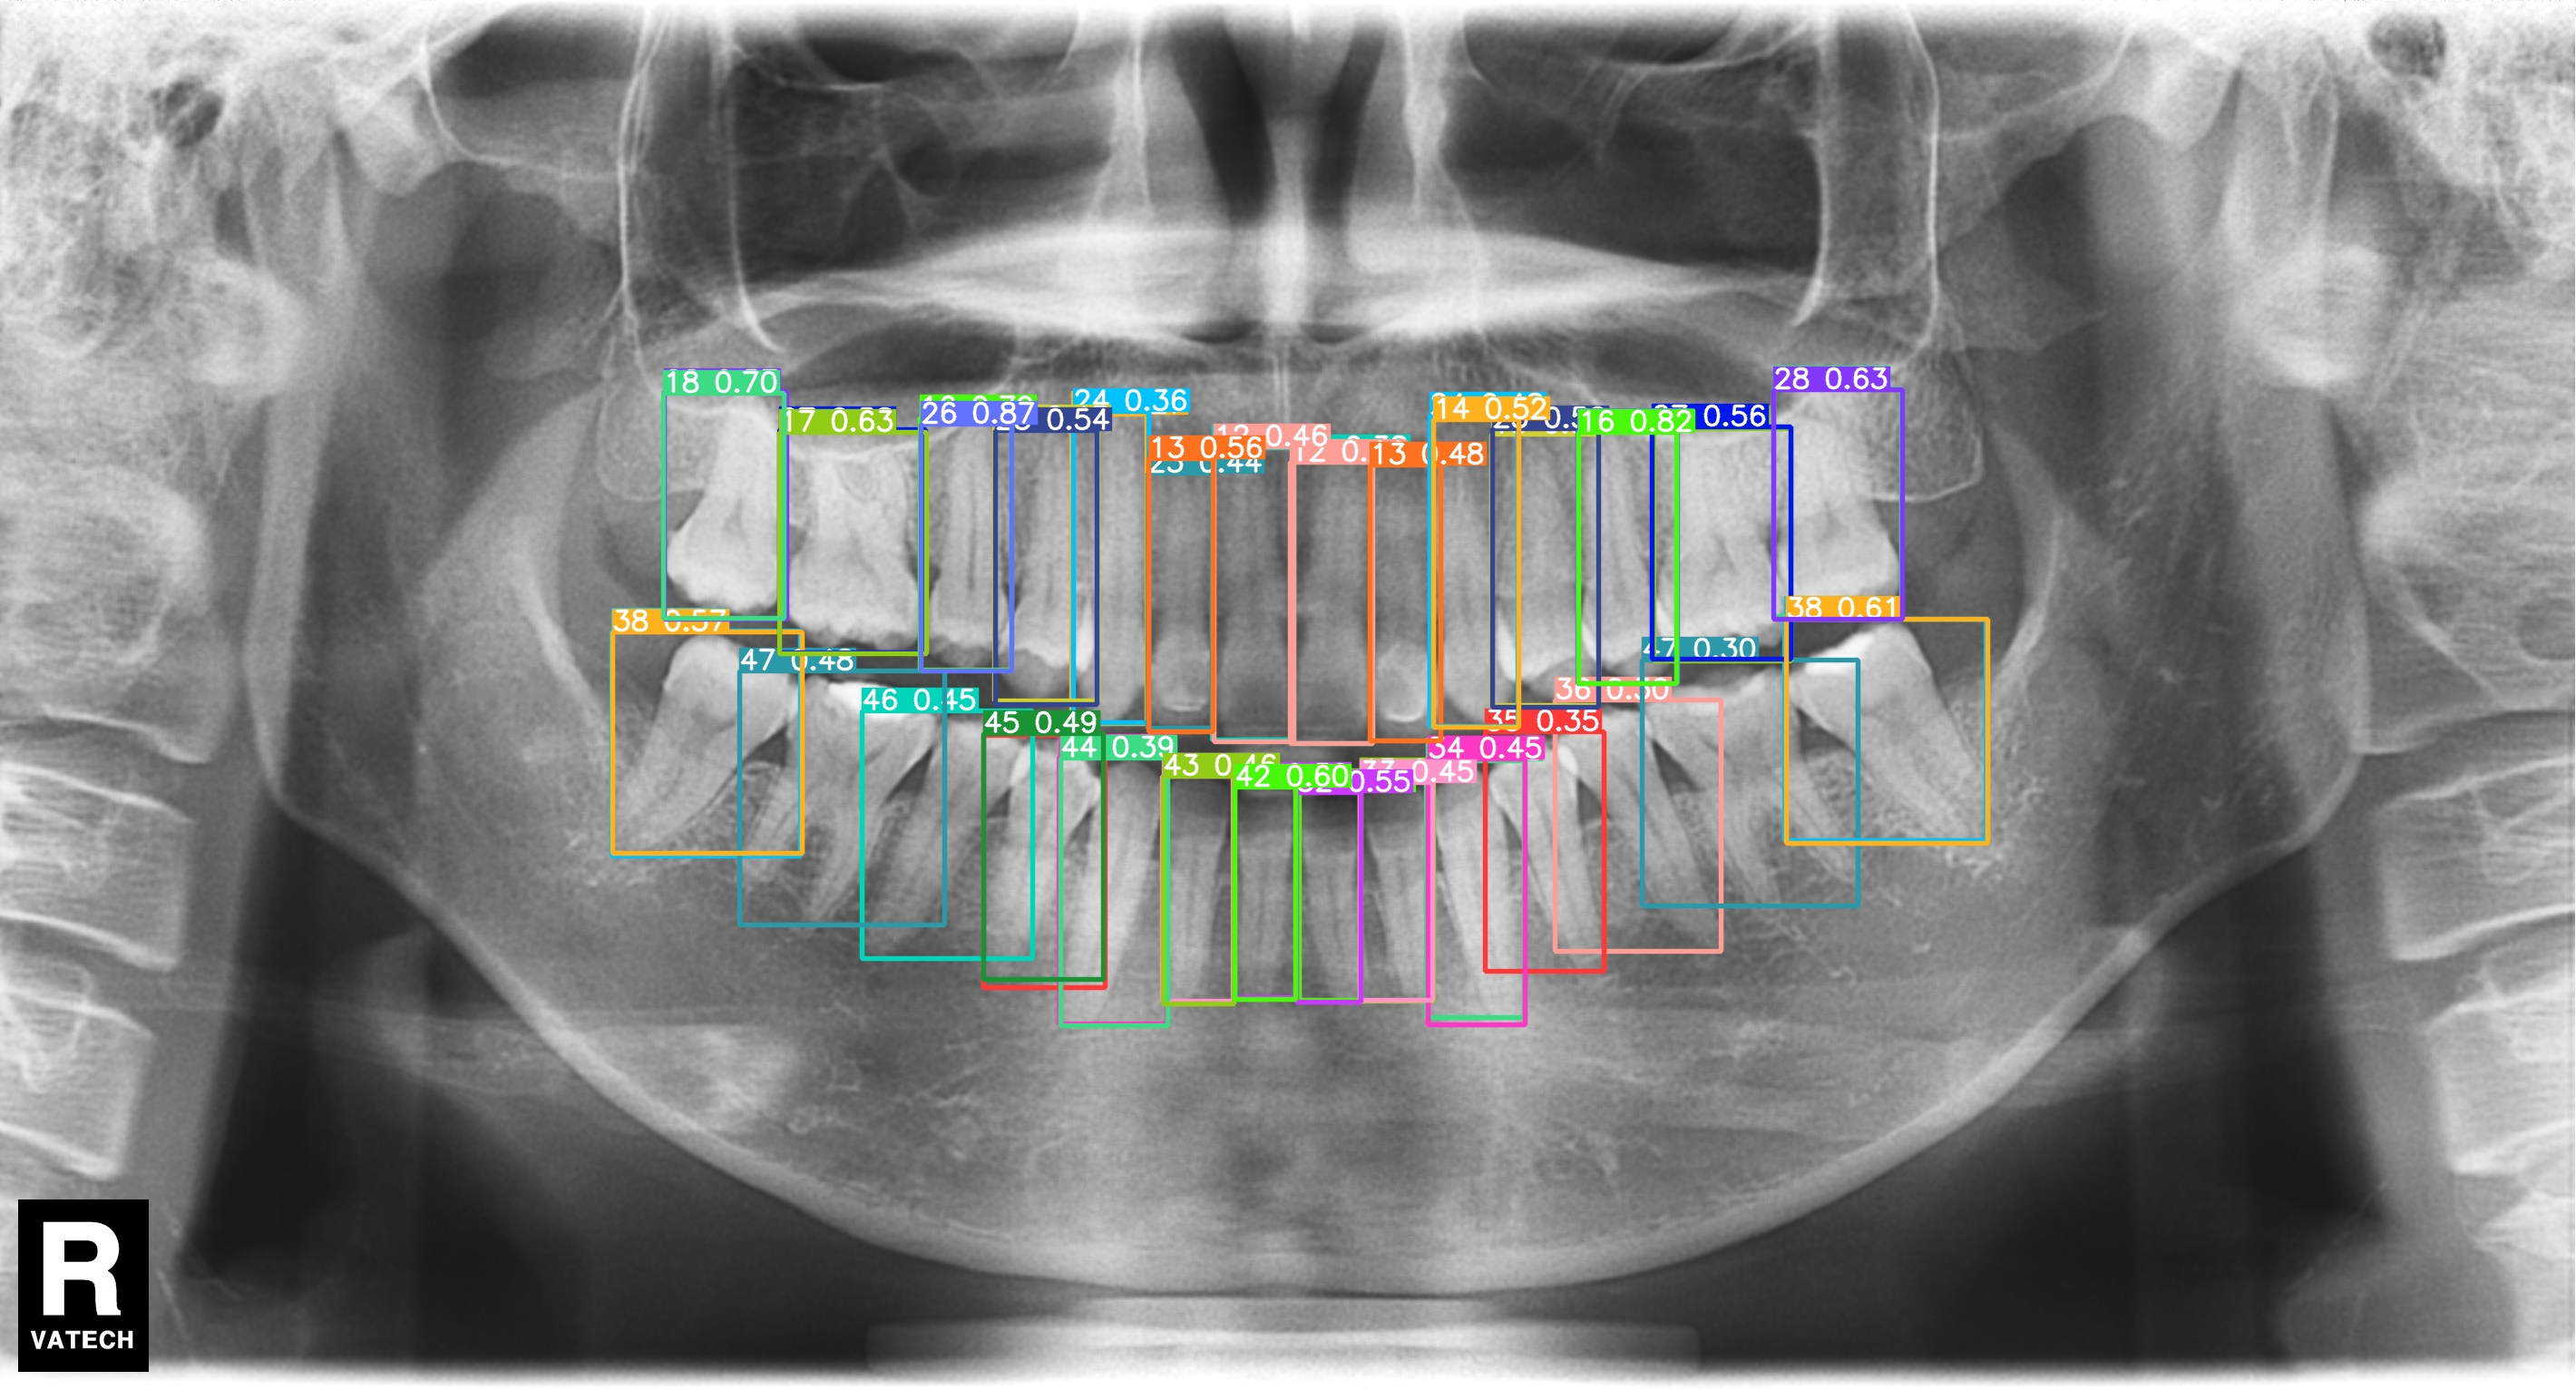

In [ ]:
Image(filename='/content/drive/MyDrive/tooth_project/runs/detect/predict/100002.jpg', height=600)